In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
inflation_path = Path("InputFiles/InflationIndexAnnual.csv")
Median_Income_path = Path("InputFiles/MedianIncomeIndexAnnual.csv")
Median_Home_Price_path = Path("InputFiles/HomeSaleIndexAnnual.csv")
MedianIncomeDollars = Path("InputFiles/MedianIncomeDollars.csv")
MedianHomeDollars = Path("InputFiles/MedianHomeSalesDollars.csv")

In [3]:
inflation = pd.read_csv(inflation_path)
Median_Income = pd.read_csv(Median_Income_path)
Median_Home_Price = pd.read_csv(Median_Home_Price_path)
Median_Income_Dollars = pd.read_csv(MedianIncomeDollars)
Median_HomeSales_Dollars = pd.read_csv(MedianHomeDollars)

In [4]:
inflation.head()

,DATE,FPCPITOTLZGUSA_NBD19840101
0,1960-01-01,33.90220
1,1961-01-01,24.89746
2,1962-01-01,27.87498
3,1963-01-01,28.82593
4,1964-01-01,29.73843


In [5]:
Median_Income.head()

,DATE,MEHOINUSA646N_NBD19840101
0,1984-01-01,100.00000
1,1985-01-01,105.36694
2,1986-01-01,111.07294
3,1987-01-01,116.26589
4,1988-01-01,121.45884


In [6]:
Median_Home_Price.head()

,DATE,MSPUS_NBD19840101
0,1963-01-01,22.57661
1,1964-01-01,23.67104
2,1965-01-01,25.17198
3,1966-01-01,26.89181
4,1967-01-01,28.45528


In [7]:
Median_Income_Dollars = Median_Income_Dollars.rename(columns = {"MEHOINUSA646N": "Median Income in Dollars"})
Median_Income_Dollars.head()

,DATE,Median Income in Dollars
0,1984-01-01,22415
1,1985-01-01,23618
2,1986-01-01,24897
3,1987-01-01,26061
4,1988-01-01,27225


In [8]:
data_type_dict1 = {"DATE": "datetime64", "Median Income in Dollars": "int64"} 
Median_Income_Dollars = Median_Income_Dollars.astype(data_type_dict1)
Median_Income_Dollars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      38 non-null     datetime64[ns]
 1   Median Income in Dollars  38 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 736.0 bytes


In [9]:
Median_HomeSales_Dollars = Median_HomeSales_Dollars.loc[Median_HomeSales_Dollars["DATE"] < "2022-01-02"]
Median_HomeSales_Dollars.tail()

,DATE,MSPUS
55,2018-01-01,325275.000000000000
56,2019-01-01,320250.000000000000
57,2020-01-01,336950.000000000000
58,2021-01-01,396800.000000000000
59,2022-01-01,457475.000000000000


In [10]:
data_type_dict0 = {"DATE": "datetime64", "MSPUS": "float"} 
Median_HomeSales_Dollars = Median_HomeSales_Dollars.astype(data_type_dict0)
Median_HomeSales_Dollars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    60 non-null     datetime64[ns]
 1   MSPUS   60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [11]:
Median_HomeSales_Dollars = Median_HomeSales_Dollars.rename(columns = {"MSPUS": "Median Home Sales in Dollars"})
Median_HomeSales_Dollars = Median_HomeSales_Dollars.loc[Median_HomeSales_Dollars["DATE"] > "1983-01-01"]
Median_HomeSales_Dollars["Median Home Sales in Dollars"] = Median_HomeSales_Dollars["Median Home Sales in Dollars"].round(2)
Median_HomeSales_Dollars.head()

,DATE,Median Home Sales in Dollars
21,1984-01-01,79950.0
22,1985-01-01,84275.0
23,1986-01-01,92025.0
24,1987-01-01,104700.0
25,1988-01-01,112225.0


In [12]:
transition_data_df = pd.merge(Median_Income, Median_Home_Price, how="left", on="DATE" )
transition_data_df.head()

,DATE,MEHOINUSA646N_NBD19840101,MSPUS_NBD19840101
0,1984-01-01,100.00000,100.00000
1,1985-01-01,105.36694,105.40963
2,1986-01-01,111.07294,115.10319
3,1987-01-01,116.26589,130.95685
4,1988-01-01,121.45884,140.36898


In [13]:
threemerge_data_df = pd.merge(transition_data_df, inflation, how="left", on="DATE")
threemerge_data_df.head()

,DATE,MEHOINUSA646N_NBD19840101,MSPUS_NBD19840101,FPCPITOTLZGUSA_NBD19840101
0,1984-01-01,100.00000,100.00000,100.00000
1,1985-01-01,105.36694,105.40963,82.44657
2,1986-01-01,111.07294,115.10319,44.13515
3,1987-01-01,116.26589,130.95685,85.21179
4,1988-01-01,121.45884,140.36898,94.81938


In [14]:
final_data_df = threemerge_data_df.rename(columns = {"MEHOINUSA646N_NBD19840101": "Median_Household_Income", "MSPUS_NBD19840101": "Median_Home_Sale_Price",
                                                    "FPCPITOTLZGUSA_NBD19840101": "Consumer_Price_Inflation"})
final_data_df.head()

,DATE,Median_Household_Income,Median_Home_Sale_Price,Consumer_Price_Inflation
0,1984-01-01,100.00000,100.00000,100.00000
1,1985-01-01,105.36694,105.40963,82.44657
2,1986-01-01,111.07294,115.10319,44.13515
3,1987-01-01,116.26589,130.95685,85.21179
4,1988-01-01,121.45884,140.36898,94.81938


In [15]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      38 non-null     object 
 1   Median_Household_Income   38 non-null     float64
 2   Median_Home_Sale_Price    38 non-null     object 
 3   Consumer_Price_Inflation  38 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.5+ KB


In [16]:
data_type_dict = {"DATE": "datetime64", "Median_Home_Sale_Price": "float64", "Consumer_Price_Inflation": "float64"} 
final_data2_df = final_data_df.astype(data_type_dict)
final_data2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      38 non-null     datetime64[ns]
 1   Median_Household_Income   38 non-null     float64       
 2   Median_Home_Sale_Price    38 non-null     float64       
 3   Consumer_Price_Inflation  38 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 KB


In [17]:
final_data2_df["Consumer_Price_Inflation"] = final_data2_df["Consumer_Price_Inflation"].round(2)
final_data2_df["Median_Home_Sale_Price"] = final_data2_df["Median_Home_Sale_Price"].round(2)
final_data2_df["Median_Household_Income"] = final_data2_df["Median_Household_Income"].round(2)
final_data2_df.head()

,DATE,Median_Household_Income,Median_Home_Sale_Price,Consumer_Price_Inflation
0,1984-01-01,100.00,100.00,100.00
1,1985-01-01,105.37,105.41,82.45
2,1986-01-01,111.07,115.10,44.14
3,1987-01-01,116.27,130.96,85.21
4,1988-01-01,121.46,140.37,94.82


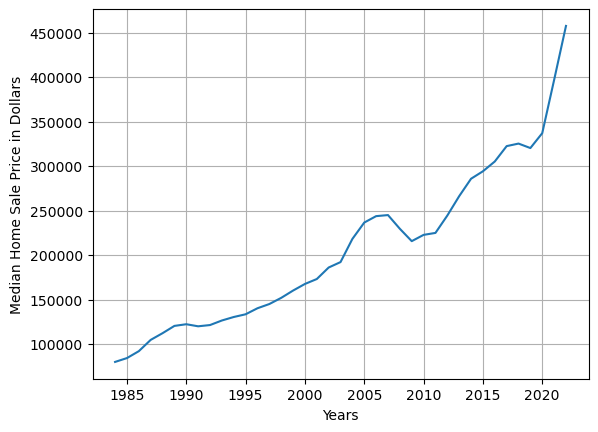

In [18]:
x_axis_data = Median_HomeSales_Dollars["DATE"]
y_axis_data = Median_HomeSales_Dollars["Median Home Sales in Dollars"]
plt.plot(x_axis_data, y_axis_data)
plt.xlabel("Years")
plt.ylabel("Median Home Sale Price in Dollars")
plt.grid()
plt.savefig("Images/MedianHomeSalePrice_dt.png")
plt.show()

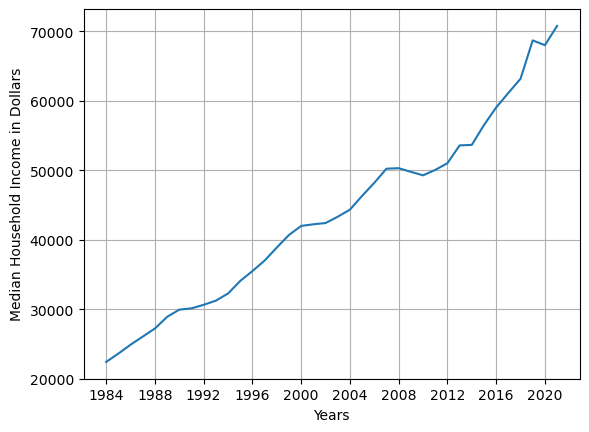

In [19]:
x_axis_data = Median_Income_Dollars["DATE"]
y_axis_data = Median_Income_Dollars["Median Income in Dollars"]
plt.plot(x_axis_data, y_axis_data)
plt.xlabel("Years")
plt.ylabel("Median Household Income in Dollars")
plt.grid()
plt.savefig("Images/MedianHouseHoldIncome_dt.png")
plt.show()

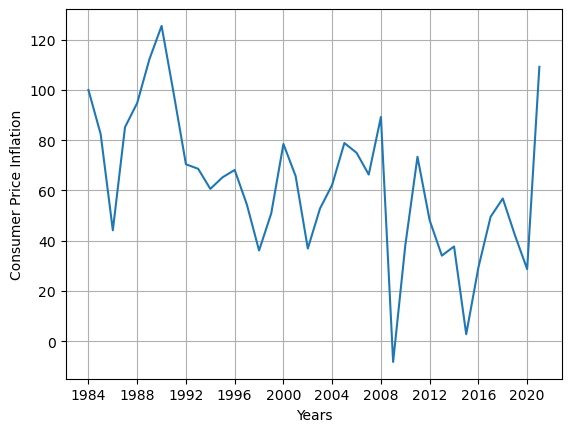

In [20]:
x_axis_data = final_data2_df["DATE"]
y_axis_data = final_data2_df["Consumer_Price_Inflation"]
plt.plot(x_axis_data, y_axis_data)
plt.grid()
plt.xlabel("Years")
plt.ylabel("Consumer Price Inflation")
plt.savefig("Images/ConsumerPriceInflation_dt.png")
plt.show()

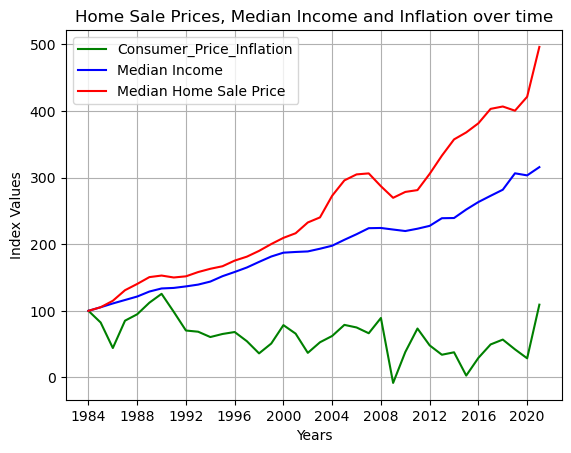

In [21]:
Date = final_data2_df["DATE"]
InflationAxis = final_data2_df["Consumer_Price_Inflation"]
MedianIncomeAxis = final_data2_df["Median_Household_Income"]
MedianHomeAxis = final_data2_df["Median_Home_Sale_Price"]

plt.plot(Date, InflationAxis, color = "green", label = "Consumer_Price_Inflation")
plt.plot(Date, MedianIncomeAxis, color = "blue", label = "Median Income")
plt.plot(Date, MedianHomeAxis, color = "red", label = "Median Home Sale Price")
plt.title("Home Sale Prices, Median Income and Inflation over time")
plt.xlabel("Years")
plt.ylabel("Index Values")
plt.legend(loc = "best")
plt.grid()
plt.savefig("Images/FinalCompare_dt.png")
plt.show()